# Best Model: SVR

Our best model was the SVR model with parameters 'svr__C': 0.1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'

In [25]:
# Importing libraries

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [29]:
np.random.seed(42) # Setting random seed

We create our pipeline with the optimal hyperparameters,but first scale the data

In [30]:
# Creating the pipeline with the optimal hyperparameters

pipeline = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 0.1, gamma = 0.01))

In [19]:
# Loading in training and test sets
X_train = pd.read_csv("../data/train_set_X.csv")
y_train = pd.read_csv("../data/train_set_y.csv").values.ravel()
X_test = pd.read_csv("../data/test_set_X.csv")
y_test = pd.read_csv("../data/test_set_y.csv").values.ravel()


We now fit our pipeline on the training data before evaluating the model on the test data

In [31]:
pipeline.fit(X_train, y_train) # Fitting the model on the training set

,steps,"[('standardscaler', ...), ('svr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,kernel,'rbf'
,degree,3
,gamma,0.01
,coef0,0.0


In [32]:
y_pred = pipeline.predict(X_test) # Making predictions on the test set

In [33]:
# Calculating scoring metrics on the test set

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"The R^2 for the test set is {r2}")
print(f"The MSE for the test set is {mse}")

The R^2 for the test set is -0.0003554235212928081
The MSE for the test set is 69.30686828903669


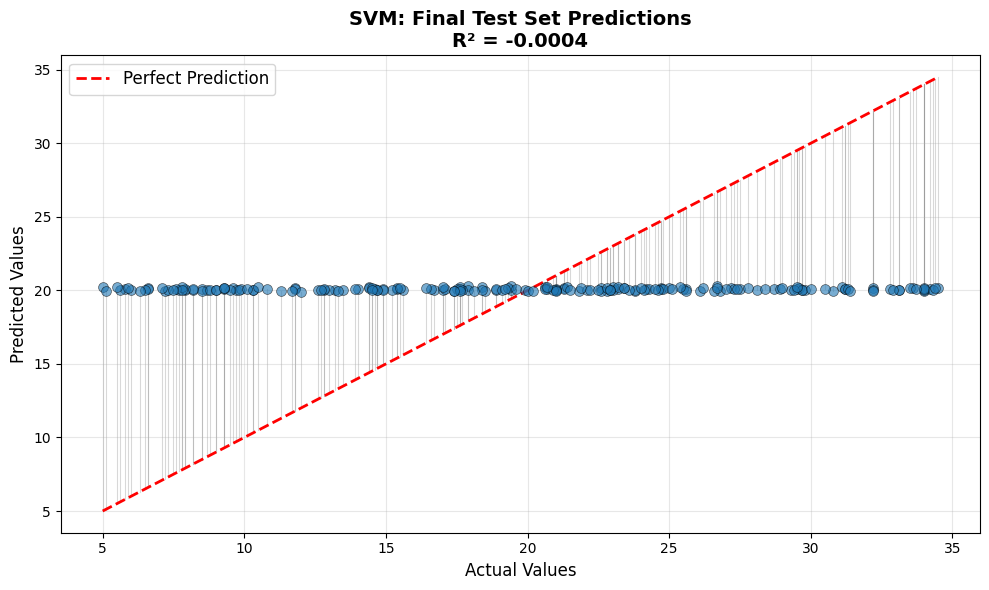

In [34]:
# Predicted vs Actual with Residual Lines
plt.figure(figsize=(10, 6))

# Plot the points
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', linewidth=0.5, s=50, zorder=3)

# Add residual lines from each point to the perfect prediction line
for actual, predicted in zip(y_test, y_pred):
    plt.plot([actual, actual], [actual, predicted], 'gray', alpha=0.3, linewidth=0.8, zorder=1)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction', zorder=2)

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title(f'SVM: Final Test Set Predictions\nR² = {r2:.4f}', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("../output/final_test_predictions.png", dpi=300, bbox_inches='tight')
plt.show()